In [44]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [22]:
# Get the S&P 500 ticker data
sp500 = yf.Ticker("^GSPC")

In [23]:
# Query historical prices
sp500 = sp500.history(period = "max")

In [24]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,0.0,0.0
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,0.0,0.0
2024-09-16 00:00:00-04:00,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,0.0,0.0


In [25]:
# Accessing the S&P 500 index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-09-05 00:00:00-04:00', '2024-09-06 00:00:00-04:00',
               '2024-09-09 00:00:00-04:00', '2024-09-10 00:00:00-04:00',
               '2024-09-11 00:00:00-04:00', '2024-09-12 00:00:00-04:00',
               '2024-09-13 00:00:00-04:00', '2024-09-16 00:00:00-04:00',
               '2024-09-17 00:00:00-04:00', '2024-09-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24295, freq=None)

<AxesSubplot:xlabel='Date'>

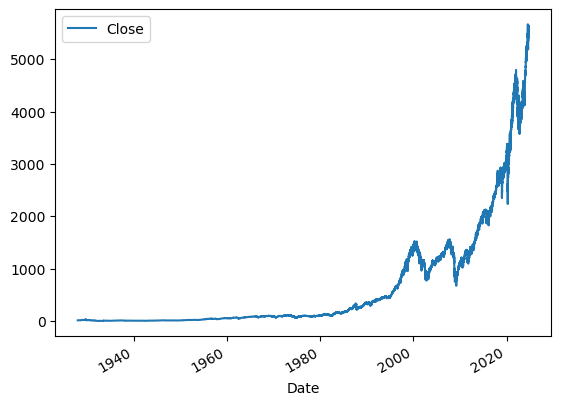

In [26]:
sp500.plot.line(y = "Close", use_index = True)

In [27]:
# Remove Dividends & Stock Splits columns from the S&P500 DF 
del sp500["Dividends"]
del sp500["Stock Splits"]

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5626.020020,1
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,5633.089844,1
2024-09-16 00:00:00-04:00,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,5634.580078,1


In [32]:
# Shift the 'Close' prices by one day to create a 'Tomorrow column'
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [33]:
# Create a 'Target' column
# 1 indicates the price increasing tomorrow
# 0 indicates that the price does not increase tomorrow
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [48]:
# Filter the DF to include data from a specific date 
sp500 = sp500.loc["1900-01-01":].copy()

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-12 00:00:00-04:00,5557.479980,5600.709961,5535.500000,5595.759766,3655070000,5626.020020,1
2024-09-13 00:00:00-04:00,5603.339844,5636.270020,5601.649902,5626.020020,3500790000,5633.089844,1
2024-09-16 00:00:00-04:00,5615.209961,5636.049805,5604.529785,5633.089844,3437070000,5634.580078,1


In [40]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [41]:
# Split the data into training and testing sets
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [43]:
# Define the predictor variables for the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fit the model using the training data
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [45]:
# Make predictions on test set
preds = model.predict(test[predictors])

# Convert predictions to a Series with the same index as test set
preds = pd.Series(preds, index = test.index)

In [59]:
# Calculate the precision score of the predictions against the actual targets
precision_score(test["Target"], preds)

0.6

In [60]:
# Combine the actual targets and predictions into single DF for comparison
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

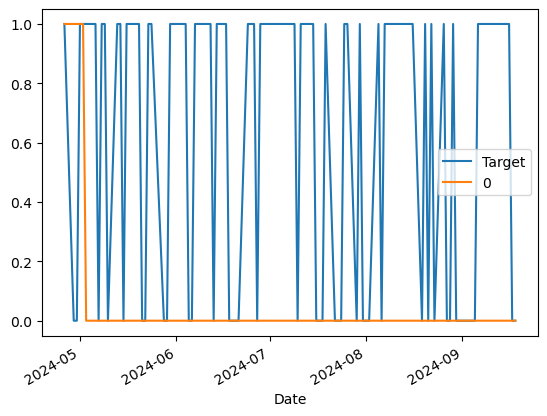

In [61]:
combined.plot()

In [70]:
def predict(train, test, predictors, model):
    # Fit the model using the training data and predictors
    model.fit(train[predictors], train["Target"])
    # Made predictions on the test set using the trained model
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    # Combine the actual targets from the test set and the predictions into DF for comparison
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [71]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_preds = []
    # Loop through the data starting from the 'start' index
    for i in range(start, data.shape[0], step):
        # Create a training set using all the data up to the current index
        train = data.iloc[0:i].copy()
        # Create a test set using the next 'step' rows
        test = data.iloc[i : (i + step)].copy()
        # Generate predictions using the training and test sets
        predictions = predict(train, test, predictors, model)
        all_preds.append(predictions)
    return pd.concat(all_preds)

In [66]:
predictions = backtest(sp500, model, predictors)

In [67]:
# Count the occurences of each unique predictions in the 'Predictions' column 
predictions["Predictions"].value_counts()

0    12312
1     9483
Name: Predictions, dtype: int64

In [68]:
# Calculate the precision score by comparing the actual targets to the predicted values
precision_score(predictions["Target"], predictions["Predictions"])

0.5171359274491195

In [69]:
# Calculate the proportion of each target class in the predictions DF
predictions["Target"].value_counts() / predictions.shape[0]

1    0.526589
0    0.473411
Name: Target, dtype: float64